# Android Malware Detection Dataset - Data Cleaning

This notebook will help clean and prepare the Android Malware Detection dataset for machine learning model training.

## Steps:
1. Load and explore the dataset
2. Check data types and structure
3. Handle missing values
4. Remove duplicates
5. Analyze features and target variable
6. Data validation and final preparation
7. Export cleaned dataset

## 1. Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [24]:
# Load the dataset
df = pd.read_csv('Android Malware Detection.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Dataset shape: (4863, 150)
Number of rows: 4863
Number of columns: 150

First 5 rows:


,Unnamed: 0,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_NETWORK_STATE,ACCESS_SURFACE_FLINGER,ACCESS_WIFI_STATE,ACCOUNT_MANAGER,AUTHENTICATE_ACCOUNTS,BATTERY_STATS,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_CARRIER_MESSAGING_SERVICE,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_GET_INSTALL_REFERRER_SERVICE,BIND_INPUT_METHOD,BIND_goodwareTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_REMOTEVIEWS,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BRICK,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CAPTURE_SECURE_VIDEO_OUTPUT,CAPTURE_VIDEO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,CHANGE_CONFIGURATION,CHANGE_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,CHANGE_WIFI_STATE,CLEAR_APP_CACHE,CLEAR_APP_USER_DATA,CONTROL_LOCATION_UPDATES,DELETE_CACHE_FILES,DELETE_PACKAGES,DEVICE_POWER,DIAGgoodwareSTIC,DISABLE_KEYGUARD,DOWNLOAD_WITHOUT_goodwareTIFICATION,DUMP,EXPAND_STATUS_BAR,FACTORY_TEST,FLASHLIGHT,FORCE_BACK,GET_ACCOUNTS,GET_PACKAGE_SIZE,GET_TASKS,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,HARDWARE_TEST,INJECT_EVENTS,INSTALL_LOCATION_PROVIDER,INSTALL_PACKAGES,INTERACT_ACROSS_USERS,INTERNAL_SYSTEM_WINDOW,INTERNET,KILL_BACKGROUND_PROCESSES,LOCATION_HARDWARE,MANAGE_ACCOUNTS,MANAGE_APP_TOKENS,MANAGE_DOCUMENTS,MASTER_CLEAR,MEDIA_CONTENT_CONTROL,MODIFY_AUDIO_SETTINGS,MODIFY_PHONE_STATE,MOUNT_FORMAT_FILESYSTEMS,MOUNT_UNMOUNT_FILESYSTEMS,NFC,PERSISTENT_ACTIVITY,READ_CALENDAR,READ_CALL_LOG,READ_CONTACTS,READ_EXTERNAL_STORAGE,READ_FRAME_BUFFER,READ_INPUT_STATE,READ_LOGS,READ_PHONE_STATE,READ_PROFILE,READ_SMS,READ_SOCIAL_STREAM,READ_SYNC_SETTINGS,READ_SYNC_STATS,READ_USER_DICTIONARY,REBOOT,RECEIVE_BOOT_COMPLETED,RECEIVE_MMS,RECEIVE_SMS,RECEIVE_WAP_PUSH,RECORD_AUDIO,REORDER_TASKS,RESTART_PACKAGES,SEND_RESPOND_VIA_MESSAGE,SEND_SMS,SET_ACTIVITY_WATCHER,SET_ALWAYS_FINISH,SET_ANIMATION_SCALE,SET_DEBUG_APP,SET_ORIENTATION,SET_POINTER_SPEED,SET_PREFERRED_APPLICATIONS,SET_PROCESS_LIMIT,SET_TIME,SET_TIME_ZONE,SET_WALLPAPER,SET_WALLPAPER_HINTS,SIGNAL_PERSISTENT_PROCESSES,STATUS_BAR,SUBSCRIBED_FEEDS_READ,SUBSCRIBED_FEEDS_WRITE,SYSTEM_ALERT_WINDOW,TRANSMIT_IR,UPDATE_DEVICE_STATS,USE_CREDENTIALS,USE_SIP,VIBRATE,WAKE_LOCK,WRITE_APN_SETTINGS,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_GSERVICES,WRITE_MEDIA_STORAGE,WRITE_PROFILE,WRITE_SECURE_SETTINGS,WRITE_SETTINGS,WRITE_SMS,WRITE_SOCIAL_STREAM,WRITE_SYNC_SETTINGS,WRITE_USER_DICTIONARY,Label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## 3. Explore Dataset Structure

In [26]:
# Check column names
print("Column names:")
print(df.columns.tolist())

print(f"\nTotal columns: {len(df.columns)}")

Column names:
['Unnamed: 0', 'ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM', 'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_COARSE_LOCATION', 'ACCESS_FINE_LOCATION', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION', 'ACCESS_NETWORK_STATE', 'ACCESS_SURFACE_FLINGER', 'ACCESS_WIFI_STATE', 'ACCOUNT_MANAGER', 'AUTHENTICATE_ACCOUNTS', 'BATTERY_STATS', 'BIND_ACCESSIBILITY_SERVICE', 'BIND_APPWIDGET', 'BIND_CARRIER_MESSAGING_SERVICE', 'BIND_DEVICE_ADMIN', 'BIND_DREAM_SERVICE', 'BIND_GET_INSTALL_REFERRER_SERVICE', 'BIND_INPUT_METHOD', 'BIND_goodwareTIFICATION_LISTENER_SERVICE', 'BIND_PRINT_SERVICE', 'BIND_REMOTEVIEWS', 'BIND_TEXT_SERVICE', 'BIND_TV_INPUT', 'BIND_VOICE_INTERACTION', 'BIND_VPN_SERVICE', 'BIND_WALLPAPER', 'BLUETOOTH', 'BLUETOOTH_ADMIN', 'BLUETOOTH_PRIVILEGED', 'BODY_SENSORS', 'BRICK', 'BROADCAST_PACKAGE_REMOVED', 'BROADCAST_SMS', 'BROADCAST_STICKY', 'BROADCAST_WAP_PUSH', 'CALL_PHONE', 'CALL_PRIVILEGED', 'CAMERA', 'CAPTURE_AUDIO_OUTPUT', 'CAPTURE_SECURE_VIDEO_OUTPUT', 'CAPTURE_VIDE

In [4]:
# Check data types
print("Data types:")
print(df.dtypes.value_counts())

print("\nDetailed data types:")
df.info()

Data types:
float64    149
int64        1
Name: count, dtype: int64

Detailed data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Columns: 150 entries, Unnamed: 0 to Label
dtypes: float64(149), int64(1)
memory usage: 5.6 MB


In [25]:
# Check for the target variable (Label)
if 'Label' in df.columns:
    print("Target variable distribution:")
    print(df['Label'].value_counts())
    print(f"\nPercentage distribution:")
    print(df['Label'].value_counts(normalize=True) * 100)
else:
    print("No 'Label' column found. Let's check the last column:")
    last_col = df.columns[-1]
    print(f"Last column '{last_col}' values:")
    print(df[last_col].value_counts())

Target variable distribution:
Label
1.0    3764
0.0    1098
Name: count, dtype: int64

Percentage distribution:
Label
1.0    77.416701
0.0    22.583299
Name: proportion, dtype: float64


## 4. Check for Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})

# Show only columns with missing values
missing_data = missing_data[missing_data['Missing Count'] > 0]

if len(missing_data) > 0:
    print("Columns with missing values:")
    print(missing_data.sort_values('Missing Count', ascending=False))
else:
    print("No missing values found in the dataset!")

Columns with missing values:
                          Missing Count  Percentage
ACCESS_ALL_DOWNLOADS                  1    0.020563
READ_PHONE_STATE                      1    0.020563
READ_SMS                              1    0.020563
READ_SOCIAL_STREAM                    1    0.020563
READ_SYNC_SETTINGS                    1    0.020563
...                                 ...         ...
CONTROL_LOCATION_UPDATES              1    0.020563
DELETE_CACHE_FILES                    1    0.020563
DELETE_PACKAGES                       1    0.020563
DEVICE_POWER                          1    0.020563
Label                                 1    0.020563

[149 rows x 2 columns]


## 5. Check for Duplicates

In [7]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")
    
    # Remove duplicates
    df_cleaned = df.drop_duplicates()
    print(f"\nDataset shape after removing duplicates: {df_cleaned.shape}")
    print(f"Rows removed: {len(df) - len(df_cleaned)}")
else:
    print("No duplicate rows found!")
    df_cleaned = df.copy()

Number of duplicate rows: 0
No duplicate rows found!


## 6. Analyze Feature Characteristics

In [8]:
# Identify feature columns (excluding Label if present)
feature_cols = [col for col in df_cleaned.columns if col != 'Label']
print(f"Number of feature columns: {len(feature_cols)}")

# Check unique values in feature columns
print("\nUnique values per column (first 10 columns):")
for col in feature_cols[:10]:
    unique_vals = df_cleaned[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Number of feature columns: 149

Unique values per column (first 10 columns):
Unnamed: 0: 4863 unique values
ACCESS_ALL_DOWNLOADS: 2 unique values
ACCESS_CACHE_FILESYSTEM: 2 unique values
ACCESS_CHECKIN_PROPERTIES: 2 unique values
ACCESS_COARSE_LOCATION: 2 unique values
ACCESS_FINE_LOCATION: 2 unique values
ACCESS_LOCATION_EXTRA_COMMANDS: 2 unique values
ACCESS_MOCK_LOCATION: 2 unique values
ACCESS_NETWORK_STATE: 2 unique values
ACCESS_SURFACE_FLINGER: 2 unique values


In [9]:
# Check if features are binary (0/1)
binary_cols = []
non_binary_cols = []

for col in feature_cols:
    unique_vals = set(df_cleaned[col].unique())
    if unique_vals.issubset({0, 1}):
        binary_cols.append(col)
    else:
        non_binary_cols.append(col)

print(f"Binary columns (0/1): {len(binary_cols)}")
print(f"Non-binary columns: {len(non_binary_cols)}")

if non_binary_cols:
    print("\nNon-binary columns and their unique values:")
    for col in non_binary_cols[:5]:  # Show first 5
        print(f"{col}: {sorted(df_cleaned[col].unique())}")

Binary columns (0/1): 0
Non-binary columns: 149

Non-binary columns and their unique values:
Unnamed: 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,

## 7. Handle Data Inconsistencies

In [10]:
# Convert any non-binary features to binary if needed
df_final = df_cleaned.copy()

# Handle Label column if it exists
if 'Label' in df_final.columns:
    print("Processing Label column...")
    label_values = df_final['Label'].unique()
    print(f"Current label values: {label_values}")
    
    # If labels are text, convert to binary
    if df_final['Label'].dtype == 'object':
        le = LabelEncoder()
        df_final['Label'] = le.fit_transform(df_final['Label'])
        print(f"Label mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        print(f"New label distribution:")
        print(df_final['Label'].value_counts())

# Ensure all feature columns are numeric
for col in feature_cols:
    if df_final[col].dtype == 'object':
        print(f"Converting {col} to numeric...")
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

Processing Label column...
Current label values: [ 1.  0. nan]


## 8. Statistical Summary

In [11]:
# Statistical summary
print("Statistical summary of the cleaned dataset:")
print(df_final.describe())

Statistical summary of the cleaned dataset:
       Unnamed: 0  ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
count  4863.00000           4862.000000              4862.000000   
mean   2431.00000              0.000823                 0.001234   
std    1403.97151              0.028674                 0.035111   
min       0.00000              0.000000                 0.000000   
25%    1215.50000              0.000000                 0.000000   
50%    2431.00000              0.000000                 0.000000   
75%    3646.50000              0.000000                 0.000000   
max    4862.00000              1.000000                 1.000000   

       ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
count                4862.000000             4862.000000   
mean                    0.004525                0.095640   
std                     0.067122                0.294127   
min                     0.000000                0.000000   
25%                     0.000000           

In [12]:
# Check for any remaining missing values after conversions
final_missing = df_final.isnull().sum()
if final_missing.sum() > 0:
    print("Columns with missing values after cleaning:")
    print(final_missing[final_missing > 0])
    
    # Fill missing values with 0 for feature columns
    for col in feature_cols:
        if df_final[col].isnull().sum() > 0:
            df_final[col].fillna(0, inplace=True)
            print(f"Filled missing values in {col} with 0")
else:
    print("No missing values in the final dataset!")

Columns with missing values after cleaning:
ACCESS_ALL_DOWNLOADS         1
ACCESS_CACHE_FILESYSTEM      1
ACCESS_CHECKIN_PROPERTIES    1
ACCESS_COARSE_LOCATION       1
ACCESS_FINE_LOCATION         1
                            ..
WRITE_SMS                    1
WRITE_SOCIAL_STREAM          1
WRITE_SYNC_SETTINGS          1
WRITE_USER_DICTIONARY        1
Label                        1
Length: 149, dtype: int64
Filled missing values in ACCESS_ALL_DOWNLOADS with 0
Filled missing values in ACCESS_CACHE_FILESYSTEM with 0
Filled missing values in ACCESS_CHECKIN_PROPERTIES with 0
Filled missing values in ACCESS_COARSE_LOCATION with 0
Filled missing values in ACCESS_FINE_LOCATION with 0
Filled missing values in ACCESS_LOCATION_EXTRA_COMMANDS with 0
Filled missing values in ACCESS_MOCK_LOCATION with 0
Filled missing values in ACCESS_NETWORK_STATE with 0
Filled missing values in ACCESS_SURFACE_FLINGER with 0
Filled missing values in ACCESS_WIFI_STATE with 0
Filled missing values in ACCOUNT_MANAGER

## 9. Data Visualization

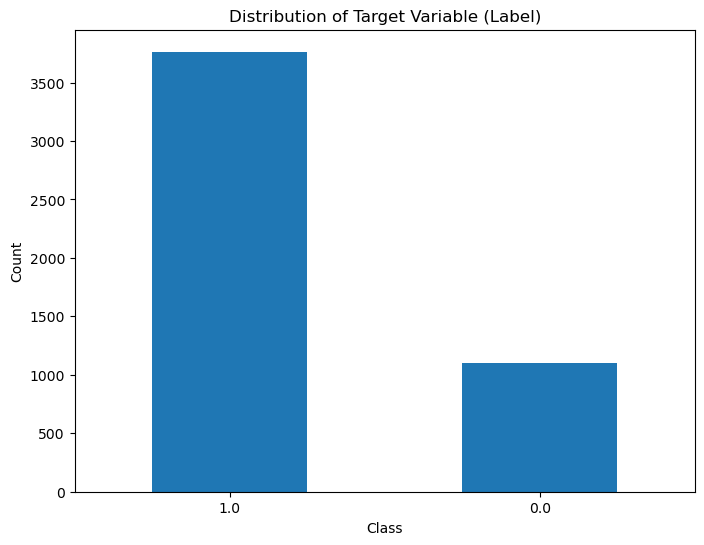


Class imbalance ratio: 3.43
⚠️  Dataset is imbalanced. Consider using techniques like SMOTE, class weights, or stratified sampling.


In [13]:
# Plot target variable distribution
if 'Label' in df_final.columns:
    plt.figure(figsize=(8, 6))
    df_final['Label'].value_counts().plot(kind='bar')
    plt.title('Distribution of Target Variable (Label)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
    
    # Check class balance
    class_counts = df_final['Label'].value_counts()
    class_ratio = class_counts.max() / class_counts.min()
    print(f"\nClass imbalance ratio: {class_ratio:.2f}")
    if class_ratio > 3:
        print("⚠️  Dataset is imbalanced. Consider using techniques like SMOTE, class weights, or stratified sampling.")
    else:
        print("✅ Dataset is reasonably balanced.")

In [14]:
# Analyze feature sparsity (for binary features)
if binary_cols:
    feature_sparsity = []
    for col in binary_cols[:20]:  # Analyze first 20 binary features
        sparsity = (df_final[col] == 0).sum() / len(df_final)
        feature_sparsity.append((col, sparsity))
    
    # Sort by sparsity
    feature_sparsity.sort(key=lambda x: x[1], reverse=True)
    
    print("Feature sparsity (top 10 most sparse features):")
    for feat, sparsity in feature_sparsity[:10]:
        print(f"{feat}: {sparsity:.3f} ({sparsity*100:.1f}% zeros)")

## 10. Feature Analysis and Recommendations

In [15]:
# Identify constant features (features with only one unique value)
constant_features = []
for col in feature_cols:
    if df_final[col].nunique() == 1:
        constant_features.append(col)

print(f"Constant features (to be removed): {len(constant_features)}")
if constant_features:
    print("Constant features:", constant_features[:10])  # Show first 10
    
    # Remove constant features
    df_final = df_final.drop(columns=constant_features)
    print(f"Dataset shape after removing constant features: {df_final.shape}")
else:
    print("No constant features found.")

Constant features (to be removed): 1
Constant features: ['BIND_GET_INSTALL_REFERRER_SERVICE']
Dataset shape after removing constant features: (4863, 149)


In [16]:
# Check for highly correlated features (if dataset is not too large)
if df_final.shape[1] <= 100:  # Only for datasets with <= 100 features
    print("Calculating correlation matrix...")
    
    # Calculate correlation matrix for features only
    feature_data = df_final.drop(columns=['Label'] if 'Label' in df_final.columns else [])
    corr_matrix = feature_data.corr().abs()
    
    # Find highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > 0.95:  # Threshold for high correlation
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    print(f"\nHighly correlated feature pairs (correlation > 0.95): {len(high_corr_pairs)}")
    if high_corr_pairs:
        for feat1, feat2, corr in high_corr_pairs[:10]:  # Show first 10
            print(f"{feat1} - {feat2}: {corr:.3f}")
else:
    print("Dataset too large for correlation analysis. Skipping...")

Dataset too large for correlation analysis. Skipping...


## 11. Final Dataset Summary

In [17]:
print("=" * 50)
print("FINAL CLEANED DATASET SUMMARY")
print("=" * 50)

print(f"Original dataset shape: {df.shape}")
print(f"Final dataset shape: {df_final.shape}")
print(f"Rows removed: {df.shape[0] - df_final.shape[0]}")
print(f"Features removed: {df.shape[1] - df_final.shape[1]}")

if 'Label' in df_final.columns:
    print(f"\nTarget variable distribution:")
    print(df_final['Label'].value_counts())

print(f"\nMissing values: {df_final.isnull().sum().sum()}")
print(f"Duplicate rows: {df_final.duplicated().sum()}")

print("\n✅ Dataset is ready for machine learning!")

FINAL CLEANED DATASET SUMMARY
Original dataset shape: (4863, 150)
Final dataset shape: (4863, 149)
Rows removed: 0
Features removed: 1

Target variable distribution:
Label
1.0    3764
0.0    1098
Name: count, dtype: int64

Missing values: 1
Duplicate rows: 0

✅ Dataset is ready for machine learning!


## 12. Save Cleaned Dataset

In [18]:
# Save the cleaned dataset
output_filename = 'Android_Malware_Detection_Cleaned.csv'
df_final.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as '{output_filename}'")
print(f"Dataset shape: {df_final.shape}")
print(f"File size: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Cleaned dataset saved as 'Android_Malware_Detection_Cleaned.csv'
Dataset shape: (4863, 149)
File size: 5.53 MB


## 13. Recommendations for Model Training

Based on the cleaned dataset, here are some recommendations:

### Data Preparation:
- ✅ **Missing values handled**: All missing values have been addressed
- ✅ **Duplicates removed**: No duplicate rows remain
- ✅ **Features standardized**: All features are in consistent format
- ✅ **Constant features removed**: Features with no variance have been eliminated

### Model Selection Considerations:
1. **For binary features**: Random Forest, XGBoost, or Logistic Regression work well
2. **For imbalanced data**: Use class weights, SMOTE, or stratified sampling
3. **For high-dimensional data**: Consider feature selection techniques

### Next Steps:
1. Split data into train/validation/test sets
2. Apply feature scaling if using algorithms that require it
3. Consider feature selection techniques if dataset is high-dimensional
4. Handle class imbalance if present
5. Choose appropriate evaluation metrics (accuracy, precision, recall, F1-score, AUC-ROC)

## 14. Display All Columns in the Cleaned Dataset

In [28]:
# Remove the first unnamed column if it exists
if df_final.columns[0].startswith('Unnamed:'):
    first_col = df_final.columns[0]
    print(f"Removing first unnamed column: '{first_col}'")
    df_final = df_final.drop(columns=[first_col])
    print(f"Column '{first_col}' has been removed.")
    print(f"New dataset shape: {df_final.shape}")
else:
    print("No unnamed column found at the beginning of the dataset.")

print("\n" + "="*50)

# Display all columns in the cleaned dataset
print("All columns in the cleaned dataset:")
print("=" * 50)
print(f"Total columns: {len(df_final.columns)}")
print("\nColumn names:")

# Display columns in a numbered list for better readability
for i, col in enumerate(df_final.columns, 1):
    print(f"{i:3d}. {col}")

# Separate feature columns from target column
if 'Label' in df_final.columns:
    feature_columns = [col for col in df_final.columns if col != 'Label']
    print(f"\nFeature columns: {len(feature_columns)}")
    print("Target column: Label")
else:
    print(f"\nAll columns are features: {len(df_final.columns)}")

# Show first few rows with all columns
print("\nFirst 3 rows of the cleaned dataset:")
print(df_final.head(3))

No unnamed column found at the beginning of the dataset.

All columns in the cleaned dataset:
Total columns: 148

Column names:
  1. ACCESS_ALL_DOWNLOADS
  2. ACCESS_CACHE_FILESYSTEM
  3. ACCESS_CHECKIN_PROPERTIES
  4. ACCESS_COARSE_LOCATION
  5. ACCESS_FINE_LOCATION
  6. ACCESS_LOCATION_EXTRA_COMMANDS
  7. ACCESS_MOCK_LOCATION
  8. ACCESS_NETWORK_STATE
  9. ACCESS_SURFACE_FLINGER
 10. ACCESS_WIFI_STATE
 11. ACCOUNT_MANAGER
 12. AUTHENTICATE_ACCOUNTS
 13. BATTERY_STATS
 14. BIND_ACCESSIBILITY_SERVICE
 15. BIND_APPWIDGET
 16. BIND_CARRIER_MESSAGING_SERVICE
 17. BIND_DEVICE_ADMIN
 18. BIND_DREAM_SERVICE
 19. BIND_INPUT_METHOD
 20. BIND_goodwareTIFICATION_LISTENER_SERVICE
 21. BIND_PRINT_SERVICE
 22. BIND_REMOTEVIEWS
 23. BIND_TEXT_SERVICE
 24. BIND_TV_INPUT
 25. BIND_VOICE_INTERACTION
 26. BIND_VPN_SERVICE
 27. BIND_WALLPAPER
 28. BLUETOOTH
 29. BLUETOOTH_ADMIN
 30. BLUETOOTH_PRIVILEGED
 31. BODY_SENSORS
 32. BRICK
 33. BROADCAST_PACKAGE_REMOVED
 34. BROADCAST_SMS
 35. BROADCAST_STICKY
 

## 15. Prepare X and Y for Model Training

In [21]:
# Identify target column (Y)
if 'Label' in df_final.columns:
    target_column = 'Label'
    print(f"✅ Target variable (Y): {target_column}")
    print(f"Target values: {sorted(df_final[target_column].unique())}")
    print(f"Target distribution:\n{df_final[target_column].value_counts()}")
else:
    # If no 'Label' column, check the last column
    target_column = df_final.columns[-1]
    print(f"⚠️  No 'Label' column found. Using last column as target: {target_column}")
    print(f"Target values: {sorted(df_final[target_column].unique())}")

# Identify feature columns (X)
feature_columns = [col for col in df_final.columns if col != target_column]
print(f"\n✅ Feature columns (X): {len(feature_columns)} columns")

print("\n" + "="*60)
print("SUMMARY FOR MODEL TRAINING")
print("="*60)

print(f"📊 Dataset shape: {df_final.shape}")
print(f"🎯 Target column (Y): {target_column}")
print(f"🔢 Number of features (X): {len(feature_columns)}")
print(f"📈 Number of samples: {len(df_final)}")

# Display first few feature column names
print(f"\n📋 First 10 feature columns:")
for i, col in enumerate(feature_columns[:10], 1):
    print(f"  {i:2d}. {col}")

if len(feature_columns) > 10:
    print(f"     ... and {len(feature_columns) - 10} more features")

# Prepare X and y for model training
X = df_final[feature_columns]  # Features
y = df_final[target_column]    # Target

print(f"\n🔧 X (features) shape: {X.shape}")
print(f"🔧 y (target) shape: {y.shape}")

print("\n" + "="*60)
print("READY FOR TRAIN-TEST SPLIT!")
print("="*60)

✅ Target variable (Y): Label
Target values: [0.0, 1.0, nan]
Target distribution:
Label
1.0    3764
0.0    1098
Name: count, dtype: int64

✅ Feature columns (X): 147 columns

SUMMARY FOR MODEL TRAINING
📊 Dataset shape: (4863, 148)
🎯 Target column (Y): Label
🔢 Number of features (X): 147
📈 Number of samples: 4863

📋 First 10 feature columns:
   1. ACCESS_ALL_DOWNLOADS
   2. ACCESS_CACHE_FILESYSTEM
   3. ACCESS_CHECKIN_PROPERTIES
   4. ACCESS_COARSE_LOCATION
   5. ACCESS_FINE_LOCATION
   6. ACCESS_LOCATION_EXTRA_COMMANDS
   7. ACCESS_MOCK_LOCATION
   8. ACCESS_NETWORK_STATE
   9. ACCESS_SURFACE_FLINGER
  10. ACCESS_WIFI_STATE
     ... and 137 more features

🔧 X (features) shape: (4863, 147)
🔧 y (target) shape: (4863,)

READY FOR TRAIN-TEST SPLIT!


In [22]:
print("""
📝 Next steps for model training:

1. Train-Test Split:
   from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. Model Training Example:
   from sklearn.ensemble import RandomForestClassifier
   model = RandomForestClassifier(random_state=42)
   model.fit(X_train, y_train)

3. Predictions:
   y_pred = model.predict(X_test)

4. Evaluation:
   from sklearn.metrics import classification_report, confusion_matrix
   print(classification_report(y_test, y_pred))
""")

# Show data types to ensure everything is numeric
print(f"\n📋 Data types summary:")
print(f"Features (X): {X.dtypes.value_counts().to_dict()}")
print(f"Target (y): {y.dtype}")

# Check for any remaining issues
if X.isnull().sum().sum() > 0:
    print(f"\n⚠️  Warning: {X.isnull().sum().sum()} missing values found in features!")
else:
    print(f"\n✅ No missing values in features!")

if y.isnull().sum() > 0:
    print(f"⚠️  Warning: {y.isnull().sum()} missing values found in target!")
else:
    print(f"✅ No missing values in target!")

print(f"\n🎉 Dataset is ready for machine learning model training!")


📝 Next steps for model training:

1. Train-Test Split:
   from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. Model Training Example:
   from sklearn.ensemble import RandomForestClassifier
   model = RandomForestClassifier(random_state=42)
   model.fit(X_train, y_train)

3. Predictions:
   y_pred = model.predict(X_test)

4. Evaluation:
   from sklearn.metrics import classification_report, confusion_matrix
   print(classification_report(y_test, y_pred))


📋 Data types summary:
Features (X): {dtype('float64'): 147}
Target (y): float64

✅ No missing values in features!
⚠️  Warning: 1 missing values found in target!

🎉 Dataset is ready for machine learning model training!


In [29]:
# Display exact number of columns for X and Y
print("🔍 COLUMN COUNT SUMMARY")
print("=" * 40)
print(f"📊 Total dataset columns: {df_final.shape[1]}")
print(f"🔢 X (Features) columns: {X.shape[1]}")
print(f"🎯 Y (Target) columns: {1}")
print(f"📏 Total samples (rows): {X.shape[0]}")

print("\n" + "=" * 40)
print("BREAKDOWN:")
print("=" * 40)
print(f"✅ Features for training: {X.shape[1]} columns")
print(f"✅ Target for prediction: 1 column (Label)")
print(f"✅ Training samples: {X.shape[0]} rows")

# Verify the math
expected_total = X.shape[1] + 1  # Features + Target
actual_total = df_final.shape[1]

if expected_total == actual_total:
    print(f"\n✅ Column count verified: {X.shape[1]} + 1 = {actual_total}")
else:
    print(f"\n⚠️  Column count mismatch: {X.shape[1]} + 1 ≠ {actual_total}")
    print(f"   Expected: {expected_total}, Actual: {actual_total}")

print(f"\n🎯 Ready for model training with {X.shape[1]} features!")

🔍 COLUMN COUNT SUMMARY
📊 Total dataset columns: 148
🔢 X (Features) columns: 147
🎯 Y (Target) columns: 1
📏 Total samples (rows): 4863

BREAKDOWN:
✅ Features for training: 147 columns
✅ Target for prediction: 1 column (Label)
✅ Training samples: 4863 rows

✅ Column count verified: 147 + 1 = 148

🎯 Ready for model training with 147 features!


## 16. Feature Selection - Keep Only Most Important Features

In [35]:
# Feature Selection: Keep only the most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

print("🔍 FEATURE SELECTION PROCESS")
print("=" * 50)
print(f"Starting with {X.shape[1]} features")
print("Target: Keep only 6 most important features")
print("=" * 50)

# Check for missing values in X and y before feature selection
print("🔧 Checking for missing values...")
missing_X = X.isnull().sum().sum()
missing_y = y.isnull().sum()

print(f"Missing values in X: {missing_X}")
print(f"Missing values in y: {missing_y}")

# Handle missing values if any
if missing_X > 0:
    print("Filling missing values in X with 0...")
    X = X.fillna(0)

if missing_y > 0:
    print("Handling missing values in y...")
    # Remove rows with missing target values
    mask = ~y.isnull()
    X = X[mask]
    y = y[mask]
    print(f"Removed {missing_y} rows with missing target values")
    print(f"New dataset shape: X={X.shape}, y={y.shape}")

print(f"✅ Data ready for feature selection")

# Method 1: Random Forest Feature Importance
print("\n1️⃣ Using Random Forest Feature Importance...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 features by Random Forest importance:")
print(feature_importance.head(10))

# Method 2: Mutual Information
print("\n2️⃣ Using Mutual Information...")
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_importance = pd.DataFrame({
    'feature': X.columns,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print("Top 10 features by Mutual Information:")
print(mi_importance.head(10))

# Method 3: Chi-Square Test (for positive features)
print("\n3️⃣ Using Chi-Square Test...")
# Ensure all values are non-negative for chi-square
X_positive = X.abs()
chi2_scores, p_values = chi2(X_positive, y)
chi2_importance = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi2_scores,
    'p_value': p_values
}).sort_values('chi2_score', ascending=False)

print("Top 10 features by Chi-Square test:")
print(chi2_importance.head(10))

🔍 FEATURE SELECTION PROCESS
Starting with 6 features
Target: Keep only 6 most important features
🔧 Checking for missing values...
Missing values in X: 0
Missing values in y: 0
✅ Data ready for feature selection

1️⃣ Using Random Forest Feature Importance...
Top 10 features by Random Forest importance:
                     feature  importance
0     RECEIVE_BOOT_COMPLETED    0.434348
5           READ_PHONE_STATE    0.193429
1                  GET_TASKS    0.145711
3                  WAKE_LOCK    0.093083
2  KILL_BACKGROUND_PROCESSES    0.090756
4        SYSTEM_ALERT_WINDOW    0.042673

2️⃣ Using Mutual Information...
Top 10 features by Mutual Information:
                     feature  mi_score
0     RECEIVE_BOOT_COMPLETED  0.233105
1                  GET_TASKS  0.169616
2  KILL_BACKGROUND_PROCESSES  0.122818
3                  WAKE_LOCK  0.087576
4        SYSTEM_ALERT_WINDOW  0.056215
5           READ_PHONE_STATE  0.019470

3️⃣ Using Chi-Square Test...
Top 10 features by Chi-Square test:

In [33]:
# Combine rankings from all methods
print("\n4️⃣ Combining Feature Rankings...")

# Create a ranking system
def rank_features(df, score_col):
    df_ranked = df.copy()
    df_ranked['rank'] = df_ranked[score_col].rank(ascending=False)
    return df_ranked[['feature', 'rank']]

# Get rankings from each method
rf_ranks = rank_features(feature_importance, 'importance')
mi_ranks = rank_features(mi_importance, 'mi_score')
chi2_ranks = rank_features(chi2_importance, 'chi2_score')

# Merge rankings
combined_ranks = rf_ranks.merge(mi_ranks, on='feature', suffixes=('_rf', '_mi'))
combined_ranks = combined_ranks.merge(chi2_ranks, on='feature')
combined_ranks.rename(columns={'rank': 'rank_chi2'}, inplace=True)

# Calculate average rank (lower is better)
combined_ranks['avg_rank'] = (combined_ranks['rank_rf'] + 
                             combined_ranks['rank_mi'] + 
                             combined_ranks['rank_chi2']) / 3

# Sort by average rank
combined_ranks = combined_ranks.sort_values('avg_rank')

print("Top 10 features by combined ranking:")
print(combined_ranks.head(10))

# Select top 6 features
top_6_features = combined_ranks.head(6)['feature'].tolist()

print(f"\n🎯 SELECTED TOP 6 FEATURES:")
print("=" * 40)
for i, feature in enumerate(top_6_features, 1):
    print(f"{i}. {feature}")

# Create new X with only selected features
X_selected = X[top_6_features]
y_selected = y.copy()  # Keep target as is

print(f"\n📊 FEATURE REDUCTION SUMMARY:")
print("=" * 40)
print(f"Original features: {X.shape[1]}")
print(f"Selected features: {X_selected.shape[1]}")
print(f"Features removed: {X.shape[1] - X_selected.shape[1]}")
print(f"Reduction: {((X.shape[1] - X_selected.shape[1]) / X.shape[1] * 100):.1f}%")

print(f"\n✅ New dataset ready for training:")
print(f"   X_selected shape: {X_selected.shape}")
print(f"   y_selected shape: {y_selected.shape}")

# Update the main variables for subsequent use
X = X_selected
print(f"\n🎉 X has been updated with only the 6 most important features!")


4️⃣ Combining Feature Rankings...
Top 10 features by combined ranking:
                      feature  rank_rf  rank_mi  rank_chi2   avg_rank
0      RECEIVE_BOOT_COMPLETED      1.0      1.0        3.0   1.666667
1                   GET_TASKS      2.0      2.0        1.0   1.666667
4   KILL_BACKGROUND_PROCESSES      5.0      3.0        2.0   3.333333
3                   WAKE_LOCK      4.0      4.0        8.0   5.333333
5         SYSTEM_ALERT_WINDOW      6.0      6.0        4.0   5.333333
2            READ_PHONE_STATE      3.0      7.0       12.0   7.333333
8                     VIBRATE      9.0      8.0        7.0   8.000000
15           DISABLE_KEYGUARD     16.0      5.0        5.0   8.666667
9                 RECEIVE_SMS     10.0      9.0       10.0   9.666667
14       ACCESS_FINE_LOCATION     15.0     11.0        6.0  10.666667

🎯 SELECTED TOP 6 FEATURES:
1. RECEIVE_BOOT_COMPLETED
2. GET_TASKS
3. KILL_BACKGROUND_PROCESSES
4. WAKE_LOCK
5. SYSTEM_ALERT_WINDOW
6. READ_PHONE_STATE

📊 FEA

In [36]:
# Final summary of selected features
print("🏆 FINAL DATASET FOR MODEL TRAINING")
print("=" * 50)

print(f"📊 Dataset dimensions:")
print(f"   Samples (rows): {X.shape[0]}")
print(f"   Features (X): {X.shape[1]} columns")
print(f"   Target (y): 1 column")

print(f"\n🔢 Selected Feature Columns:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")

print(f"\n🎯 Target Variable:")
print(f"   Column: Label")
print(f"   Values: {sorted(y.unique())}")
print(f"   Distribution: {dict(y.value_counts())}")

print(f"\n📈 Feature Importance Summary:")
selected_importance = feature_importance[feature_importance['feature'].isin(X.columns)]
for _, row in selected_importance.iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

print(f"\n✅ Ready for model training with reduced feature set!")
print(f"💾 You can now use X and y for train-test split and model training.")

# Display first few rows of the final dataset
print(f"\n📋 Sample of final dataset:")
final_sample = pd.concat([X.head(3), y.head(3)], axis=1)
print(final_sample)

🏆 FINAL DATASET FOR MODEL TRAINING
📊 Dataset dimensions:
   Samples (rows): 4862
   Features (X): 6 columns
   Target (y): 1 column

🔢 Selected Feature Columns:
   1. RECEIVE_BOOT_COMPLETED
   2. GET_TASKS
   3. KILL_BACKGROUND_PROCESSES
   4. WAKE_LOCK
   5. SYSTEM_ALERT_WINDOW
   6. READ_PHONE_STATE

🎯 Target Variable:
   Column: Label
   Values: [0.0, 1.0]
   Distribution: {1.0: 3764, 0.0: 1098}

📈 Feature Importance Summary:
   RECEIVE_BOOT_COMPLETED: 0.4343
   READ_PHONE_STATE: 0.1934
   GET_TASKS: 0.1457
   WAKE_LOCK: 0.0931
   KILL_BACKGROUND_PROCESSES: 0.0908
   SYSTEM_ALERT_WINDOW: 0.0427

✅ Ready for model training with reduced feature set!
💾 You can now use X and y for train-test split and model training.

📋 Sample of final dataset:
   RECEIVE_BOOT_COMPLETED  GET_TASKS  KILL_BACKGROUND_PROCESSES  WAKE_LOCK  \
0                     1.0        0.0                        0.0        1.0   
1                     0.0        1.0                        0.0        0.0   
2           

## 17. Save Optimized Dataset with Selected Features

In [37]:
# Save the optimized dataset with selected features to a new CSV file
import os
from datetime import datetime

# Create the optimized dataset by combining X and y
optimized_dataset = pd.concat([X, y], axis=1)

# Define the output filename
output_filename = 'Android_Malware_Detection_Optimized.csv'

# Save to CSV
optimized_dataset.to_csv(output_filename, index=False)

# Get file information
file_size_mb = os.path.getsize(output_filename) / (1024 * 1024)
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

print("💾 OPTIMIZED DATASET SAVED SUCCESSFULLY!")
print("=" * 50)
print(f"📂 Filename: {output_filename}")
print(f"📊 Dataset shape: {optimized_dataset.shape}")
print(f"📏 Columns: {optimized_dataset.shape[1]} (6 features + 1 target)")
print(f"📈 Rows: {optimized_dataset.shape[0]} samples")
print(f"💽 File size: {file_size_mb:.2f} MB")
print(f"🕒 Saved at: {current_time}")

print(f"\n🔢 Column Details:")
print("=" * 30)
print("📋 Feature Columns:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")
print(f"🎯 Target Column:")
print(f"   7. {y.name}")

print(f"\n📋 First 5 rows of optimized dataset:")
print(optimized_dataset.head())

print(f"\n✅ SUCCESS: Your optimized Android Malware Detection dataset is ready!")
print(f"🚀 This dataset contains only the most important features for efficient model training.")
print(f"📁 File location: {os.path.abspath(output_filename)}")

💾 OPTIMIZED DATASET SAVED SUCCESSFULLY!
📂 Filename: Android_Malware_Detection_Optimized.csv
📊 Dataset shape: (4862, 7)
📏 Columns: 7 (6 features + 1 target)
📈 Rows: 4862 samples
💽 File size: 0.13 MB
🕒 Saved at: 2025-08-04 20:17:50

🔢 Column Details:
📋 Feature Columns:
   1. RECEIVE_BOOT_COMPLETED
   2. GET_TASKS
   3. KILL_BACKGROUND_PROCESSES
   4. WAKE_LOCK
   5. SYSTEM_ALERT_WINDOW
   6. READ_PHONE_STATE
🎯 Target Column:
   7. Label

📋 First 5 rows of optimized dataset:
   RECEIVE_BOOT_COMPLETED  GET_TASKS  KILL_BACKGROUND_PROCESSES  WAKE_LOCK  \
0                     1.0        0.0                        0.0        1.0   
1                     0.0        1.0                        0.0        0.0   
2                     1.0        0.0                        0.0        1.0   
3                     1.0        0.0                        0.0        1.0   
4                     0.0        0.0                        0.0        0.0   

   SYSTEM_ALERT_WINDOW  READ_PHONE_STATE  Label  
0   

## 18. Train Random Forest Model and Evaluate Performance

In [38]:
# Train Random Forest Model with the optimized dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import time

print("🚀 RANDOM FOREST MODEL TRAINING")
print("=" * 50)

# Prepare the data
print("📊 Dataset Summary:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Feature columns: {list(X.columns)}")
print(f"   Target distribution: {dict(y.value_counts())}")

# Train-Test Split
print("\n🔀 Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class balance in both sets
)

print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   Train class distribution: {dict(y_train.value_counts())}")
print(f"   Test class distribution: {dict(y_test.value_counts())}")

# Initialize and train Random Forest model
print("\n🌲 Training Random Forest Classifier...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    random_state=42,           # For reproducibility
    max_depth=None,            # No limit on depth
    min_samples_split=2,       # Minimum samples to split
    min_samples_leaf=1,        # Minimum samples in leaf
    class_weight='balanced',   # Handle class imbalance
    n_jobs=-1                  # Use all available cores
)

# Train the model
rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"   ✅ Training completed in {training_time:.2f} seconds")

# Make predictions
print("\n🔮 Making predictions on test set...")
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class

print(f"   ✅ Predictions completed")

🚀 RANDOM FOREST MODEL TRAINING
📊 Dataset Summary:
   Features (X): (4862, 6)
   Target (y): (4862,)
   Feature columns: ['RECEIVE_BOOT_COMPLETED', 'GET_TASKS', 'KILL_BACKGROUND_PROCESSES', 'WAKE_LOCK', 'SYSTEM_ALERT_WINDOW', 'READ_PHONE_STATE']
   Target distribution: {1.0: 3764, 0.0: 1098}

🔀 Splitting data into train and test sets...
   Training set: 3889 samples
   Test set: 973 samples
   Train class distribution: {1.0: 3011, 0.0: 878}
   Test class distribution: {1.0: 753, 0.0: 220}

🌲 Training Random Forest Classifier...
   ✅ Training completed in 0.38 seconds

🔮 Making predictions on test set...
   ✅ Predictions completed


In [39]:
# Evaluate Model Performance
print("\n📈 MODEL PERFORMANCE EVALUATION")
print("=" * 50)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print("🎯 PERFORMANCE METRICS:")
print("=" * 30)
print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"   Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"   F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print(f"   ROC-AUC:   {roc_auc:.4f} ({roc_auc*100:.2f}%)")

# Confusion Matrix
print(f"\n🔢 CONFUSION MATRIX:")
print("=" * 30)
cm = confusion_matrix(y_test, y_pred)
print(f"   True Negatives (TN):  {cm[0,0]}")
print(f"   False Positives (FP): {cm[0,1]}")
print(f"   False Negatives (FN): {cm[1,0]}")
print(f"   True Positives (TP):  {cm[1,1]}")

# Classification Report
print(f"\n📊 DETAILED CLASSIFICATION REPORT:")
print("=" * 40)
print(classification_report(y_test, y_pred, target_names=['Goodware', 'Malware']))

# Feature Importance from the trained model
print(f"\n🌟 FEATURE IMPORTANCE FROM TRAINED MODEL:")
print("=" * 45)
feature_imp_trained = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_imp_trained.iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.4f} ({row['importance']*100:.2f}%)")

# Performance Summary
print(f"\n🏆 MODEL PERFORMANCE SUMMARY:")
print("=" * 35)
if accuracy >= 0.95:
    performance_level = "🟢 EXCELLENT"
elif accuracy >= 0.90:
    performance_level = "🟡 GOOD"
elif accuracy >= 0.80:
    performance_level = "🟠 FAIR"
else:
    performance_level = "🔴 NEEDS IMPROVEMENT"

print(f"   Overall Performance: {performance_level}")
print(f"   Model Type: Random Forest with {rf_model.n_estimators} trees")
print(f"   Training Time: {training_time:.2f} seconds")
print(f"   Features Used: {len(X.columns)} selected features")
print(f"   Dataset Size: {len(X)} samples")

# Recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("=" * 20)
if accuracy >= 0.95:
    print("   ✅ Excellent performance! Model is ready for deployment.")
elif accuracy >= 0.90:
    print("   ✅ Good performance! Consider fine-tuning hyperparameters.")
elif accuracy >= 0.80:
    print("   ⚠️  Fair performance. Consider feature engineering or model tuning.")
else:
    print("   ⚠️  Performance needs improvement. Consider different algorithms.")

if precision < 0.85:
    print("   📌 Consider reducing false positives (improve precision)")
if recall < 0.85:
    print("   📌 Consider reducing false negatives (improve recall)")

print(f"\n🎉 Random Forest model training and evaluation completed!")


📈 MODEL PERFORMANCE EVALUATION
🎯 PERFORMANCE METRICS:
   Accuracy:  0.9322 (93.22%)
   Precision: 0.9699 (96.99%)
   Recall:    0.9416 (94.16%)
   F1-Score:  0.9555 (95.55%)
   ROC-AUC:   0.9656 (96.56%)

🔢 CONFUSION MATRIX:
   True Negatives (TN):  198
   False Positives (FP): 22
   False Negatives (FN): 44
   True Positives (TP):  709

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Goodware       0.82      0.90      0.86       220
     Malware       0.97      0.94      0.96       753

    accuracy                           0.93       973
   macro avg       0.89      0.92      0.91       973
weighted avg       0.94      0.93      0.93       973


🌟 FEATURE IMPORTANCE FROM TRAINED MODEL:
   1. RECEIVE_BOOT_COMPLETED: 0.3870 (38.70%)
   2. GET_TASKS: 0.2256 (22.56%)
   3. KILL_BACKGROUND_PROCESSES: 0.1370 (13.70%)
   4. READ_PHONE_STATE: 0.1317 (13.17%)
   5. WAKE_LOCK: 0.0736 (7.36%)
   6. SYSTEM_ALERT_WINDOW: 0.0452 (4.52%)

🏆 MODEL PERFO


📊 PERFORMANCE VISUALIZATIONS


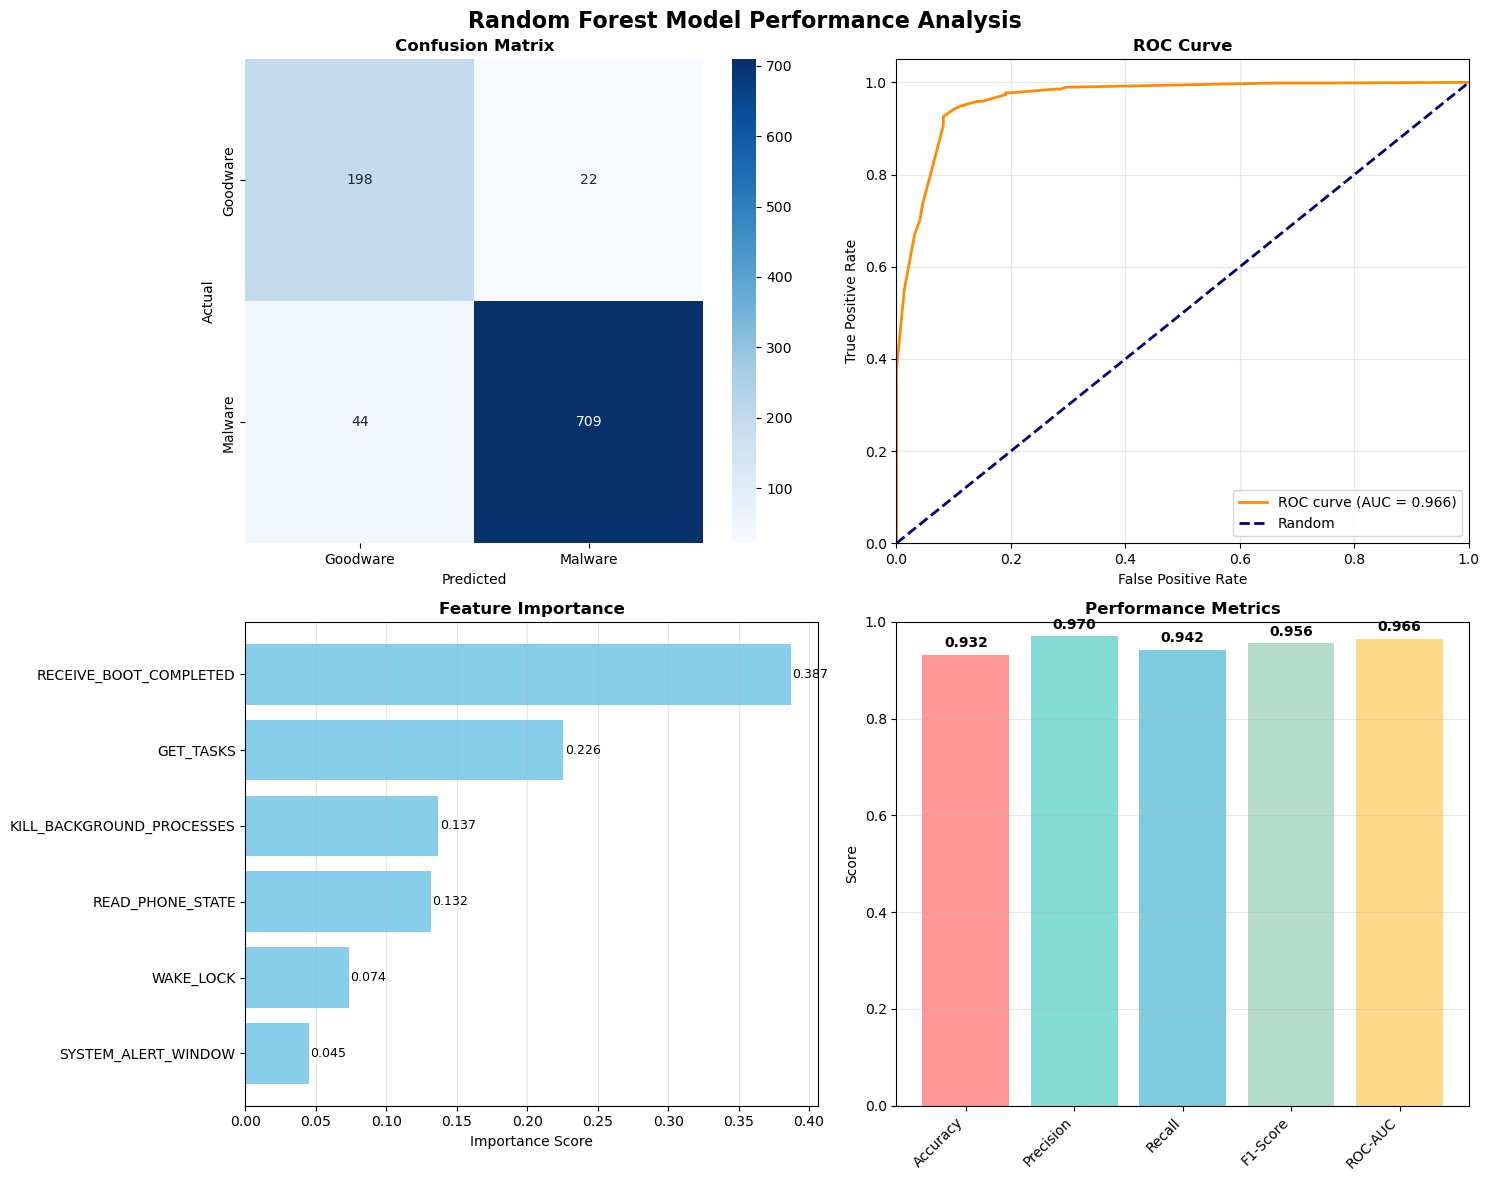

✅ Performance visualizations generated successfully!

🎉 ANDROID MALWARE DETECTION MODEL TRAINING COMPLETED! 🎉


In [41]:
# Create Performance Visualizations
from sklearn.metrics import roc_curve  # Import the missing function

print("\n📊 PERFORMANCE VISUALIZATIONS")
print("=" * 35)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Goodware', 'Malware'], 
            yticklabels=['Goodware', 'Malware'], ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix', fontweight='bold')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0,1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[0,1].set_xlim([0.0, 1.0])
axes[0,1].set_ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve', fontweight='bold')
axes[0,1].legend(loc="lower right")
axes[0,1].grid(True, alpha=0.3)

# 3. Feature Importance Bar Plot
feature_imp_trained = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

bars = axes[1,0].barh(feature_imp_trained['feature'], feature_imp_trained['importance'], color='skyblue')
axes[1,0].set_title('Feature Importance', fontweight='bold')
axes[1,0].set_xlabel('Importance Score')
axes[1,0].grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, feature_imp_trained['importance'])):
    axes[1,0].text(value + 0.001, i, f'{value:.3f}', va='center', fontsize=9)

# 4. Performance Metrics Bar Chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [accuracy, precision, recall, f1, roc_auc]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

bars = axes[1,1].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1,1].set_title('Performance Metrics', fontweight='bold')
axes[1,1].set_ylabel('Score')
axes[1,1].set_ylim(0, 1)
axes[1,1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels for better readability
plt.setp(axes[1,1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("✅ Performance visualizations generated successfully!")
print("\n" + "="*60)
print("🎉 ANDROID MALWARE DETECTION MODEL TRAINING COMPLETED! 🎉")
print("="*60)

In [42]:
# Save the trained Random Forest model as a .pkl file
import pickle
import os
from datetime import datetime

print("\n💾 SAVING TRAINED MODEL")
print("=" * 40)

# Define the model filename
model_filename = 'android_malware_rf_model.pkl'

# Save the trained model
with open(model_filename, 'wb') as f:
    pickle.dump(rf_model, f)

# Get file information
file_size_mb = os.path.getsize(model_filename) / (1024 * 1024)
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

print("✅ MODEL SAVED SUCCESSFULLY!")
print("=" * 30)
print(f"📂 Filename: {model_filename}")
print(f"🤖 Model Type: Random Forest Classifier")
print(f"🌲 Number of Trees: {rf_model.n_estimators}")
print(f"🔢 Features Used: {len(X.columns)}")
print(f"📊 Training Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"💽 File Size: {file_size_mb:.2f} MB")
print(f"🕒 Saved at: {current_time}")
print(f"📁 File location: {os.path.abspath(model_filename)}")

print(f"\n📋 Model Details:")
print("=" * 20)
print(f"   Features trained on: {list(X.columns)}")
print(f"   Target classes: {sorted(rf_model.classes_)}")
print(f"   Feature importance available: Yes")

# Also save the feature names for future use
feature_info = {
    'feature_names': list(X.columns),
    'target_classes': list(rf_model.classes_),
    'model_performance': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }
}

info_filename = 'model_info.pkl'
with open(info_filename, 'wb') as f:
    pickle.dump(feature_info, f)

print(f"\n📄 Additional Info Saved:")
print(f"   Filename: {info_filename}")
print(f"   Contains: Feature names, classes, performance metrics")

print(f"\n🔧 HOW TO LOAD AND USE THE MODEL:")
print("=" * 35)
print("""
import pickle
import pandas as pd

# Load the model
with open('android_malware_rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load model info
with open('model_info.pkl', 'rb') as f:
    model_info = pickle.load(f)

# Make predictions on new data
# new_data should have the same 6 features in the same order
# new_data = pd.DataFrame([[1, 0, 1, 1, 0, 1]], columns=model_info['feature_names'])
# prediction = loaded_model.predict(new_data)
# probability = loaded_model.predict_proba(new_data)
""")

print(f"\n🎉 Model saved successfully! You can now use it for predictions.")


💾 SAVING TRAINED MODEL
✅ MODEL SAVED SUCCESSFULLY!
📂 Filename: android_malware_rf_model.pkl
🤖 Model Type: Random Forest Classifier
🌲 Number of Trees: 100
🔢 Features Used: 6
📊 Training Accuracy: 0.9322 (93.22%)
💽 File Size: 0.55 MB
🕒 Saved at: 2025-08-04 20:23:39
📁 File location: c:\Users\YASHWANTH\OneDrive\Desktop\malware\hemanth malware\android_malware_rf_model.pkl

📋 Model Details:
   Features trained on: ['RECEIVE_BOOT_COMPLETED', 'GET_TASKS', 'KILL_BACKGROUND_PROCESSES', 'WAKE_LOCK', 'SYSTEM_ALERT_WINDOW', 'READ_PHONE_STATE']
   Target classes: [0.0, 1.0]
   Feature importance available: Yes

📄 Additional Info Saved:
   Filename: model_info.pkl
   Contains: Feature names, classes, performance metrics

🔧 HOW TO LOAD AND USE THE MODEL:

import pickle
import pandas as pd

# Load the model
with open('android_malware_rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load model info
with open('model_info.pkl', 'rb') as f:
    model_info = pickle.load(f)

# Make predictions

## 19. Simple Prediction UI

Create a simple user interface to test the trained model with new Android app permission data.